In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
# import seaborn as sns

2024-02-05 12:38:35.264388: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [42]:
feature_names = pd.read_csv('../../../Dataset/Exoskeleton/Feature Name.csv')

# Create a list of feature names
header_list = feature_names['Feature'].tolist()

# Read the dataset CSV file
dataset = pd.read_csv('../../../Dataset/Exoskeleton/Dataset.csv', names=header_list)

# Print the first few rows of the dataset and feature names
dataset

,IMU1_GyroX_Mean,IMU1_GyroX_StdDev,IMU1_GyroX_RMS,IMU1_GyroX_Amp,IMU1_GyroY_Mean,IMU1_GyroY_StdDev,IMU1_GyroY_RMS,IMU1_GyroY_Amp,IMU1_GyroZ_Mean,IMU1_GyroZ_StdDev,...,OFS_FIB_MDF,OFS_FIB_IMNF,EMG_EMG_Mean,EMG_EMG_StdDev,EMG_EMG_RMS,EMG_EMG_Amp,EMG_EMG_MNF,EMG_EMG_MDF,EMG_EMG_IMNF,Fatigue_level
0,-7082.108609,568.164429,593.320009,727.671625,9456.718907,610.892516,672.664608,744.159826,-744.252427,567.506829,...,0.247898,0.989183,247.044115,611.569045,306.910586,514.609792,0.385845,0.234438,8.372799,1
1,3618.245437,1537.254629,1540.972428,1855.355638,4828.685519,2177.145176,2187.176663,2466.309254,-638.476505,1500.476246,...,0.195446,0.912529,713.389659,1127.501511,767.921875,968.529167,0.426387,0.192446,7.684195,1
2,-1539.312493,2426.076723,2428.697877,2399.474310,-5421.387863,4325.733672,4335.967864,4673.869608,173.236814,1786.550574,...,0.198108,0.880923,2214.542677,4157.944918,2493.259693,3969.429341,0.501780,0.220765,7.496121,1
3,7033.417484,4093.630313,4098.750633,4226.794681,12939.540257,5757.809481,5771.405144,5956.878301,-471.185026,2576.663841,...,0.196975,0.866541,1845.087028,3967.695662,2170.624354,3711.081268,0.442899,0.234207,7.517077,1
4,6806.563555,5668.820658,5674.815026,5161.800619,9194.092868,5947.973167,5957.315658,6586.179357,-380.324080,3116.816583,...,0.198009,0.862710,1570.583077,2590.940237,1707.822718,2133.200211,0.286129,0.200091,7.290842,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,1.459953,302.165254,301.503058,1138.739949,-0.608012,118.889854,118.661495,542.764377,6.080662,205.739277,...,0.116385,1.273950,4.658602,3.314692,5.716955,11.004409,0.305160,0.216712,6.489056,2
1235,-1.432971,291.350671,290.770462,1050.589313,-6.159452,116.657386,116.625888,519.877863,-0.801293,212.987234,...,0.123922,1.844038,6.028471,6.045090,8.536235,21.298811,0.455111,0.258341,6.526541,2
1236,0.140037,286.360127,285.789324,1125.245420,0.115397,118.160392,117.925226,544.940458,-4.547205,215.121415,...,0.129963,0.835486,7.906608,9.449667,12.319276,32.551617,0.580757,0.417305,36.348074,2
1237,1.423339,301.925060,301.370889,1322.046915,-0.105598,134.099715,133.853402,612.407125,-5.898012,226.485897,...,0.130355,0.803396,4.222231,3.057452,5.212554,10.940857,0.413170,0.189037,7.795994,3


In [43]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1] - 1

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=header_list[:-1])

y_category = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_category, test_size=0.2, random_state=42)

model = tf.keras.models.load_model('../../../Model/Exoskeleton/Baseline/exo_model')

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test, y_pred)
cm

8/8 [==============================] - 0s 3ms/step


array([[90,  0,  0],
       [ 0, 68,  7],
       [ 0,  6, 77]])

In [36]:
def median_euclidean_distance(data_point, data_set):
    # 确保数据点和数据集是NumPy数组
    data_point = np.array(data_point)
    data_set = np.array(data_set)

    # 计算数据集中每个特征的中位数
    medians = np.median(data_set, axis=0)

    # 计算数据点与中位数之间的欧氏距离
    distance = np.sqrt(np.sum((data_point - medians) ** 2))

    return distance

In [38]:
high_medium_indices = [i for i, (true, pred) in enumerate(zip(y_test, y_pred)) if true == 2 and pred == 1]
high_medium_features = X_scaled.iloc[high_medium_indices, :]
high_medium_features

,IMU1_GyroX_Mean,IMU1_GyroX_StdDev,IMU1_GyroX_RMS,IMU1_GyroX_Amp,IMU1_GyroY_Mean,IMU1_GyroY_StdDev,IMU1_GyroY_RMS,IMU1_GyroY_Amp,IMU1_GyroZ_Mean,IMU1_GyroZ_StdDev,...,OFS_FIB_MNF,OFS_FIB_MDF,OFS_FIB_IMNF,EMG_EMG_Mean,EMG_EMG_StdDev,EMG_EMG_RMS,EMG_EMG_Amp,EMG_EMG_MNF,EMG_EMG_MDF,EMG_EMG_IMNF
5,-1.220986,0.382500,0.385054,0.306628,0.178111,1.046615,1.048923,1.384241,-0.112261,0.640429,...,-0.334257,-0.200503,-0.403582,0.863234,0.592821,0.750799,0.505920,-0.289374,0.032710,-0.221369
31,-0.026333,2.272109,2.273255,2.249843,-2.630733,3.301067,3.308449,3.703245,0.007452,2.779974,...,-0.334651,-0.135677,1.034880,2.260573,0.819605,1.766154,0.856532,-0.536750,-0.178866,-0.187735
35,-0.036455,-0.369301,-0.367388,-0.232127,-0.003670,-0.383427,-0.383240,-0.153252,0.003142,-0.509098,...,-0.338994,-0.098211,-0.479009,-0.453704,-0.298112,-0.399950,-0.330652,-0.251802,0.125975,-0.209071
71,-0.030635,-0.418749,-0.416554,-0.472964,-0.018065,-0.419936,-0.413986,-0.293462,-0.004685,-0.537697,...,-0.811653,-0.190886,-0.363793,-0.460710,-0.299561,-0.406211,-0.335531,1.033902,1.491695,-0.199179
180,-0.033049,-0.404496,-0.402418,-0.380982,-0.003845,-0.348868,-0.348755,0.022777,0.003293,-0.485693,...,-0.679449,-0.506142,-0.354385,-0.451813,-0.298395,-0.398860,-0.329652,-0.555130,-0.407126,-0.171812
242,-0.017835,-0.098976,-0.097779,0.782423,0.000152,-0.311002,-0.311085,0.083012,-0.004845,-0.295074,...,0.028631,-0.292522,-0.105918,-0.456809,-0.298584,-0.402544,-0.330810,0.371572,-0.057934,-0.392135


In [25]:
from maraboupy import Marabou
# Load the network
network = Marabou.read_onnx('../Model/STS/FeatureReduced/sts_model_top10_without_softmax.onnx')

# Get the input and output variable numbers, assuming a single input and output
inputVars = network.inputVars[0][0]
outputVars = network.outputVars[0]

# Set the input constraints for the particular data point you want to test
data_point = high_medium_features  # Replace with the values of your data point
data_point

,Spine abduction-adduction max velocity,Ankle flexo-extension range,Spine abduction-adduction range,Hip flexo-extension max velocity,M_shoulder depth range,Hip flexo-extension range,Spine flexo-extension min velocity,Stand-to-stand time,Spine abduction-adduction min velocity,M_hip depth range
12,1.1564,1.1564,0.66097,0.66097,0.78686,1.20520,1.20520,1.3050,1.2545,1.2866
14,1.4214,1.4214,0.85836,0.85836,0.79349,1.21210,1.21210,1.3375,1.2367,1.0457
31,1.2665,1.2665,1.04580,1.04580,0.81767,1.10640,1.10640,1.3997,1.1346,1.0157
49,1.3565,1.3565,1.03430,1.03430,0.79461,1.16600,1.16600,1.0351,1.1819,1.1529
74,1.1068,1.1068,0.97276,0.97276,0.91288,0.99207,0.99207,1.1975,1.0763,1.0013
89,1.2183,1.2183,0.68698,0.68698,0.78222,1.21730,1.21730,1.2159,1.2551,1.1419
95,1.0652,1.0652,0.65936,0.65936,0.88757,1.02640,1.02640,1.2100,1.0488,1.0689
101,1.4169,1.4169,0.89046,0.89046,0.75942,1.23470,1.23470,1.2363,1.3055,1.3163
124,1.2247,1.2247,1.05980,1.05980,0.86950,1.07640,1.07640,1.2033,1.1029,1.0337
131,1.8603,1.8603,1.14080,1.14080,0.81740,1.11920,1.11920,1.4450,1.1993,1.2216


In [44]:
# Add the fatigued level to the scaled data
X_scaled['Fatigue_level'] = y
X_scaled

,IMU1_GyroX_Mean,IMU1_GyroX_StdDev,IMU1_GyroX_RMS,IMU1_GyroX_Amp,IMU1_GyroY_Mean,IMU1_GyroY_StdDev,IMU1_GyroY_RMS,IMU1_GyroY_Amp,IMU1_GyroZ_Mean,IMU1_GyroZ_StdDev,...,OFS_FIB_MDF,OFS_FIB_IMNF,EMG_EMG_Mean,EMG_EMG_StdDev,EMG_EMG_RMS,EMG_EMG_Amp,EMG_EMG_MNF,EMG_EMG_MDF,EMG_EMG_IMNF,Fatigue_level
0,-1.312028,-0.395986,-0.390470,-0.643490,1.280893,-0.358352,-0.342135,-0.489719,-0.119842,-0.409869,...,0.098514,-0.184842,-0.244428,-0.091635,-0.193251,-0.123738,-0.009963,0.259430,-0.024829,0
1,0.617448,-0.267666,-0.265117,-0.436214,0.652095,0.045051,0.048277,0.034777,-0.102515,-0.109538,...,-0.233188,-0.308485,0.165778,0.084102,0.128338,0.064347,0.097443,-0.049874,-0.154786,0
2,-0.312557,-0.149974,-0.147691,-0.336201,-0.740553,0.598439,0.602194,0.707110,0.030450,-0.017448,...,-0.216352,-0.359466,1.486218,1.116332,1.331886,1.307796,0.297176,0.158717,-0.190281,0
3,1.233268,0.070832,0.073219,-0.000327,1.754094,0.967283,0.972222,1.097861,-0.075112,0.236897,...,-0.223515,-0.382666,1.161239,1.051529,1.106824,1.200747,0.141185,0.257728,-0.186326,0
4,1.192362,0.279407,0.281696,0.171534,1.245211,1.016261,1.020146,1.289521,-0.060228,0.410777,...,-0.216976,-0.388845,0.919780,0.582578,0.783987,0.546939,-0.274136,0.006442,-0.229022,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,-0.034727,-0.431208,-0.429070,-0.567932,-0.004047,-0.485071,-0.484946,-0.551056,0.003069,-0.526326,...,-0.733160,0.274493,-0.457634,-0.298819,-0.403356,-0.332411,-0.223717,0.128862,-0.380340,1
1235,-0.035248,-0.432640,-0.430490,-0.584135,-0.004801,-0.485646,-0.485471,-0.558026,0.001941,-0.523992,...,-0.685496,1.194055,-0.456429,-0.297889,-0.401389,-0.328146,0.173539,0.435491,-0.373265,1
1236,-0.034965,-0.433301,-0.431149,-0.570413,-0.003949,-0.485259,-0.485136,-0.550393,0.001328,-0.523305,...,-0.647295,-0.432757,-0.454777,-0.296729,-0.398750,-0.323483,0.506406,1.606373,5.254823,1
1237,-0.034733,-0.431240,-0.429088,-0.534239,-0.003979,-0.481154,-0.481030,-0.529845,0.001106,-0.519647,...,-0.644814,-0.484518,-0.458018,-0.298907,-0.403708,-0.332438,0.062427,-0.074980,-0.133687,2


In [46]:
# subdataset with high fatigue level
high_dataset = X_scaled[X_scaled['Fatigue_level'] == 2].iloc[:, :-1]
high_dataset

,IMU1_GyroX_Mean,IMU1_GyroX_StdDev,IMU1_GyroX_RMS,IMU1_GyroX_Amp,IMU1_GyroY_Mean,IMU1_GyroY_StdDev,IMU1_GyroY_RMS,IMU1_GyroY_Amp,IMU1_GyroZ_Mean,IMU1_GyroZ_StdDev,...,OFS_FIB_MNF,OFS_FIB_MDF,OFS_FIB_IMNF,EMG_EMG_Mean,EMG_EMG_StdDev,EMG_EMG_RMS,EMG_EMG_Amp,EMG_EMG_MNF,EMG_EMG_MDF,EMG_EMG_IMNF
43,-0.037424,-0.345336,-0.343481,-0.065894,-0.008191,-0.381881,-0.381670,-0.118637,0.001527,-0.520344,...,-0.337247,-0.198090,0.219184,-0.454890,-0.299085,-0.401637,-0.332621,-0.525826,-0.246259,0.536143
44,-0.030740,-0.333328,-0.331484,-0.079989,-0.005648,-0.374254,-0.374262,-0.091165,0.002238,-0.504666,...,-0.354597,-0.248763,-0.336585,-0.454322,-0.298814,-0.401025,-0.332081,-0.383409,-0.202995,-0.135576
45,-0.033167,-0.330531,-0.328728,-0.028397,-0.004844,-0.370937,-0.370980,-0.065874,0.002662,-0.512206,...,-0.365174,-0.252249,-0.436246,-0.455569,-0.299078,-0.402141,-0.332866,-0.066707,-0.283807,-0.206430
46,-0.042872,-0.321048,-0.319152,0.075919,-0.004941,-0.369878,-0.369896,-0.048463,0.000858,-0.523954,...,-0.366736,-0.305242,-0.459181,-0.454096,-0.298459,-0.400564,-0.329730,-0.430507,-0.180826,-0.256114
47,-0.035198,-0.312725,-0.310953,0.105949,-0.009345,-0.359430,-0.359087,-0.031340,0.002659,-0.527963,...,-0.309901,-0.222236,-0.452079,-0.454987,-0.298863,-0.401552,-0.332302,-0.143314,-0.242490,-0.152405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,-0.036855,-0.380591,-0.378593,-0.263418,-0.003597,-0.478670,-0.478544,-0.507254,0.001502,-0.486338,...,-0.198792,0.060275,-0.384638,-0.455644,-0.298674,-0.401856,-0.331896,-0.409825,-0.026194,-0.349016
1212,-0.037438,-0.371328,-0.369325,-0.244124,-0.003449,-0.480995,-0.480846,-0.523234,0.002273,-0.480588,...,-0.066782,0.283552,-0.383035,-0.455247,-0.298466,-0.401373,-0.331753,-0.464227,0.009903,-0.139278
1213,-0.033889,-0.382486,-0.380487,-0.293566,-0.004262,-0.484234,-0.484115,-0.536444,0.002315,-0.482952,...,-0.156155,0.086279,-0.365376,-0.455370,-0.298756,-0.401739,-0.331639,-0.562514,-0.102522,-0.179434
1237,-0.034733,-0.431240,-0.429088,-0.534239,-0.003979,-0.481154,-0.481030,-0.529845,0.001106,-0.519647,...,-0.873712,-0.644814,-0.484518,-0.458018,-0.298907,-0.403708,-0.332438,0.062427,-0.074980,-0.133687


In [47]:
# Dataset mean Euclidean distance except high_medium_indices
euclidean_dis_norm_mean = 0
for i in range(len(high_dataset)):
    if i not in high_medium_indices:
        euclidean_dis_norm_mean += median_euclidean_distance(high_dataset.iloc[i, :], high_dataset)
euclidean_dis_norm_mean /= len(high_dataset) - len(high_medium_indices)
print(euclidean_dis_norm_mean)

2.7216753129940883


In [48]:
euclidean_dis = []
for i in range(len(high_medium_indices)):
    euclidean_dis.append(median_euclidean_distance(high_medium_features.iloc[i, :], high_dataset))

print(euclidean_dis)

[7.778406233797433, 16.85531704434261, 0.7120562699485614, 2.644386947413712, 1.5376604310411857, 2.356001164668365]


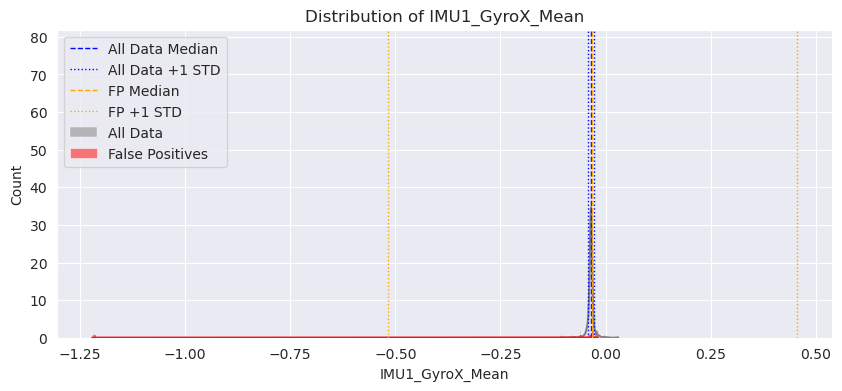

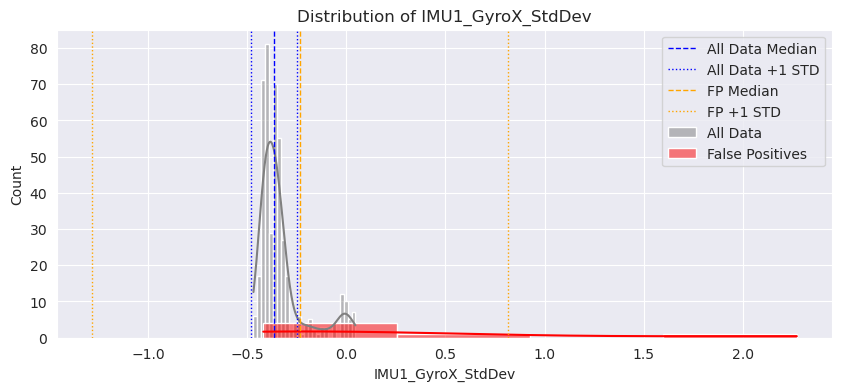

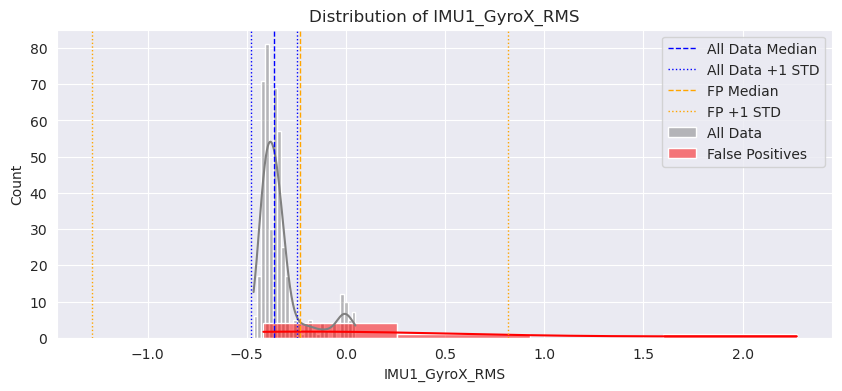

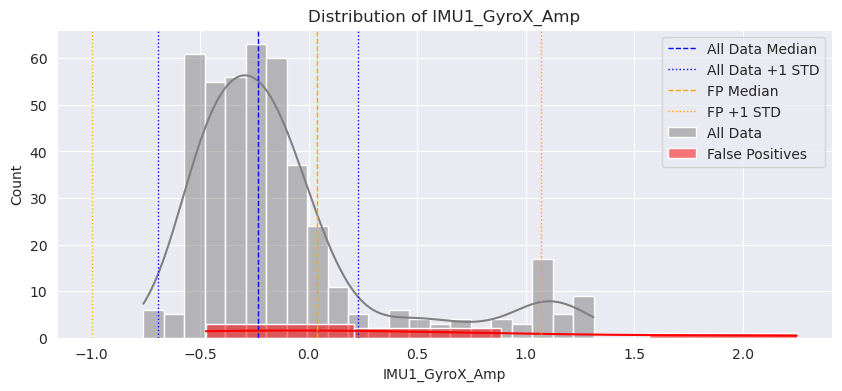

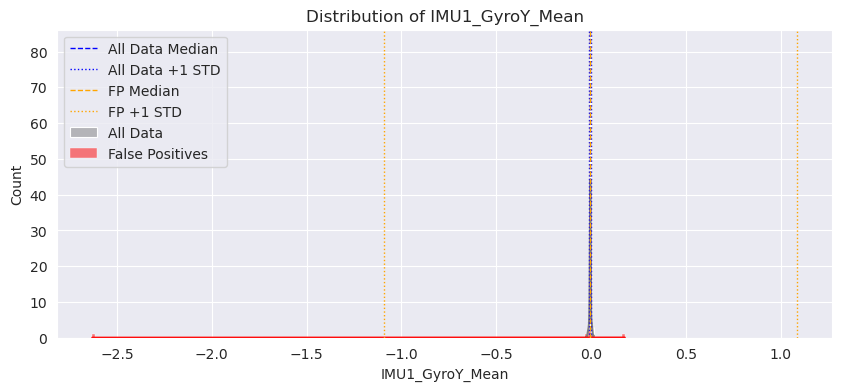

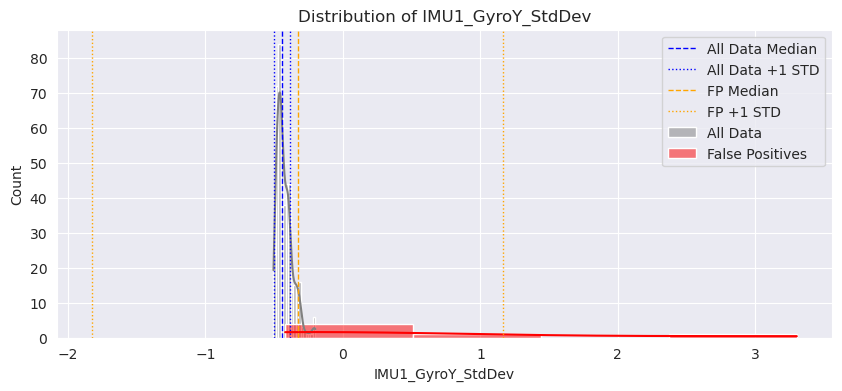

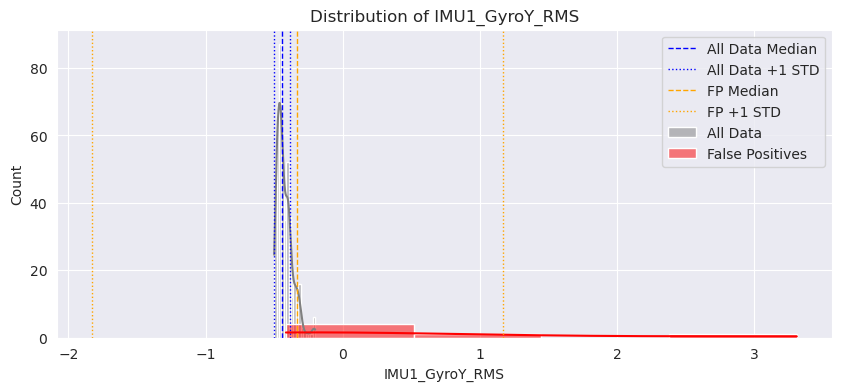

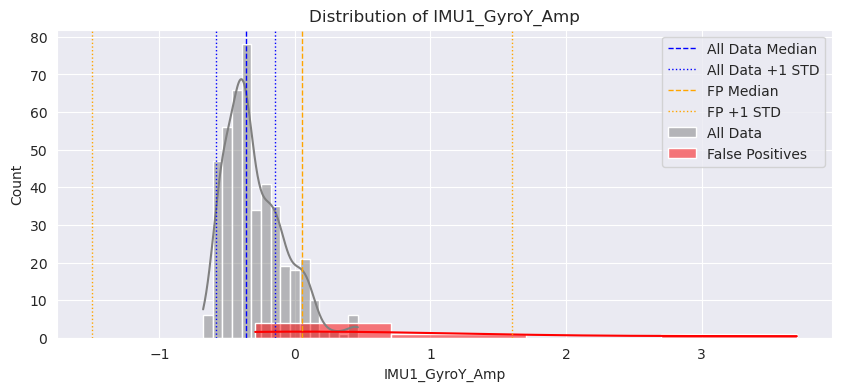

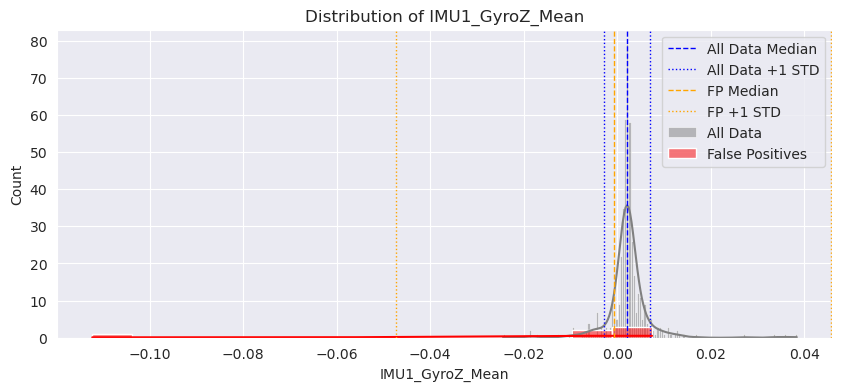

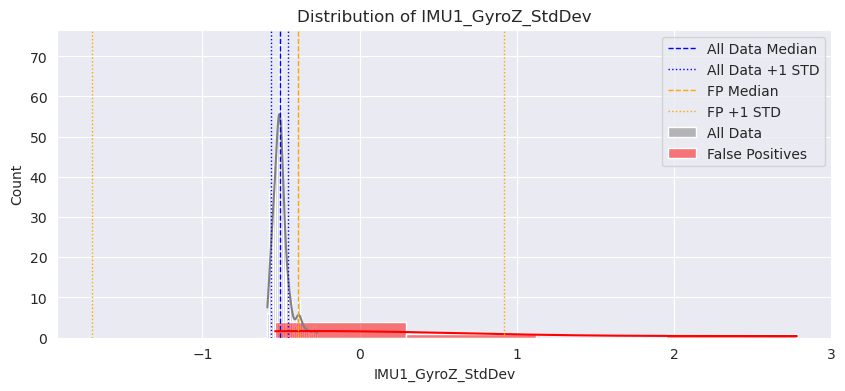

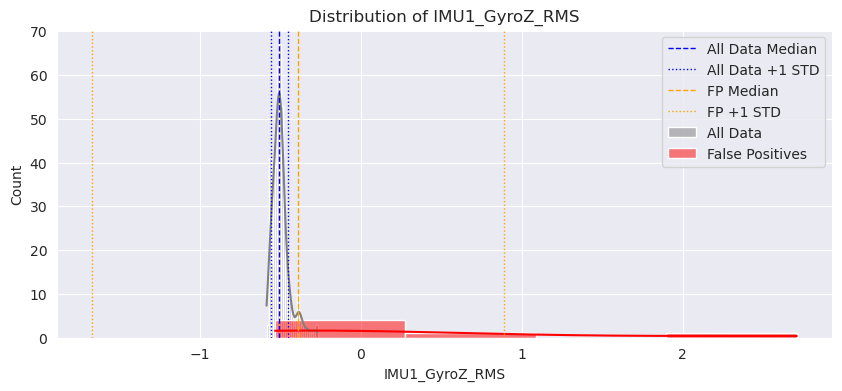

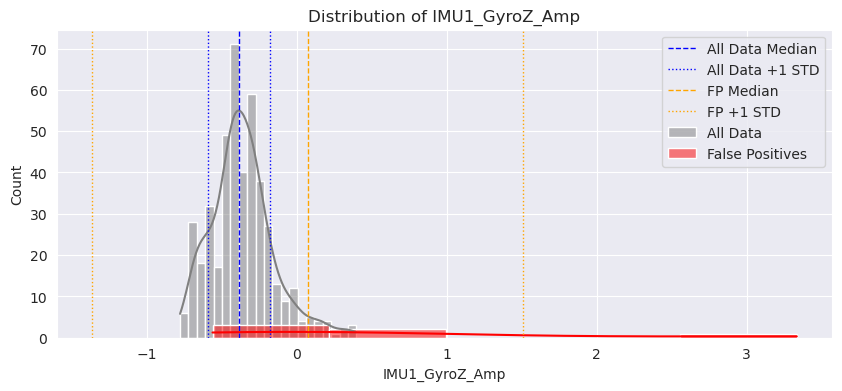

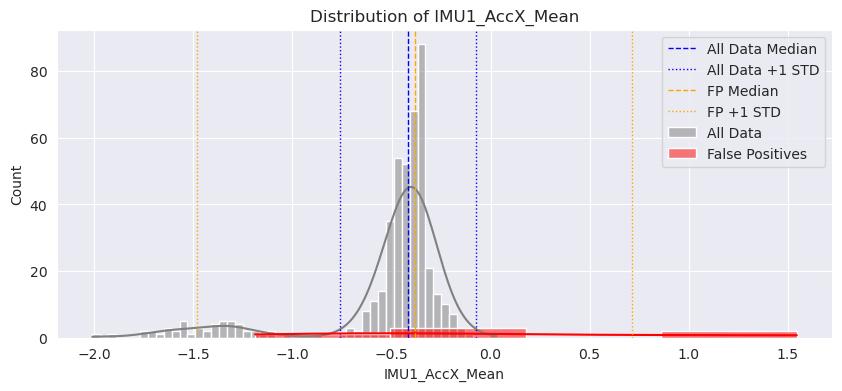

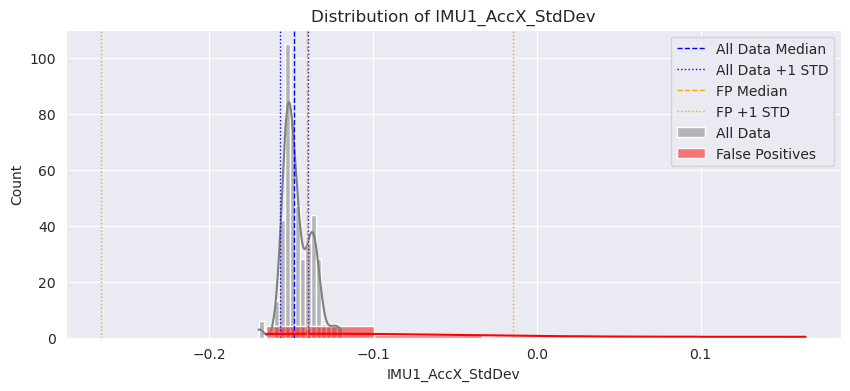

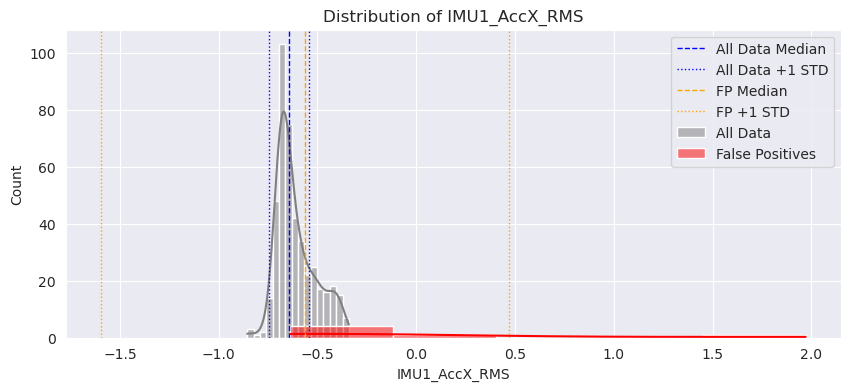

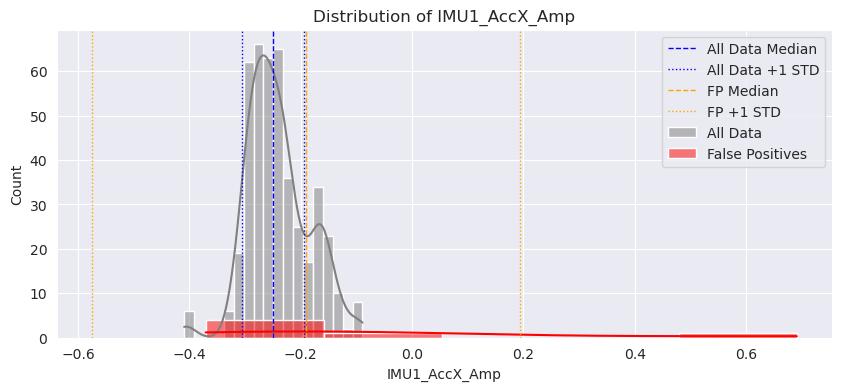

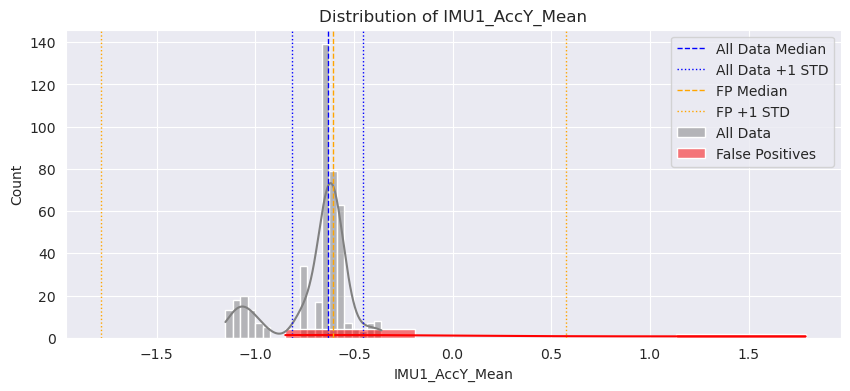

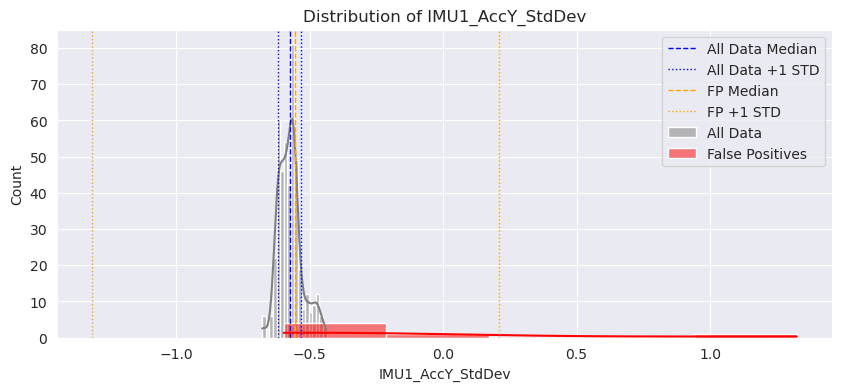

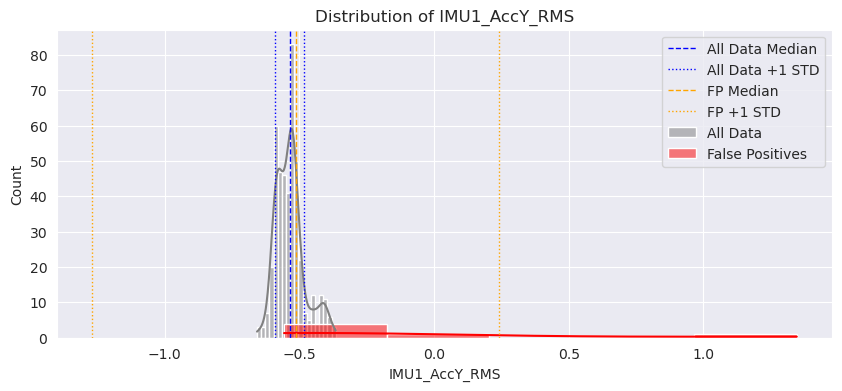

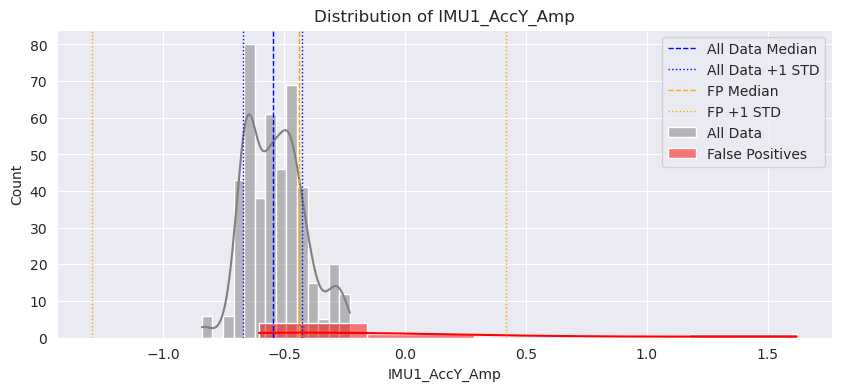

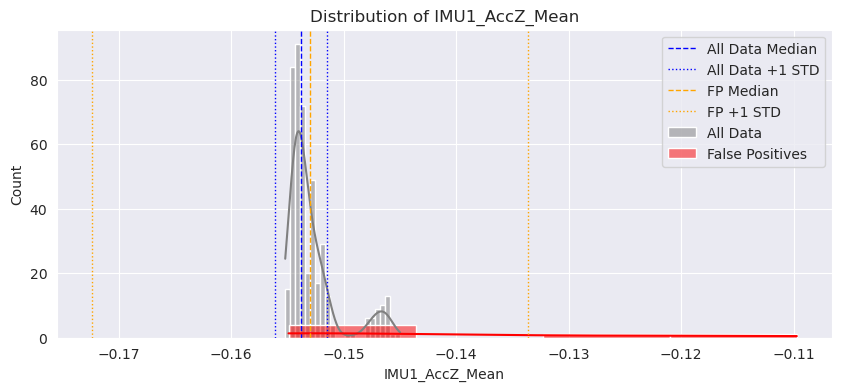

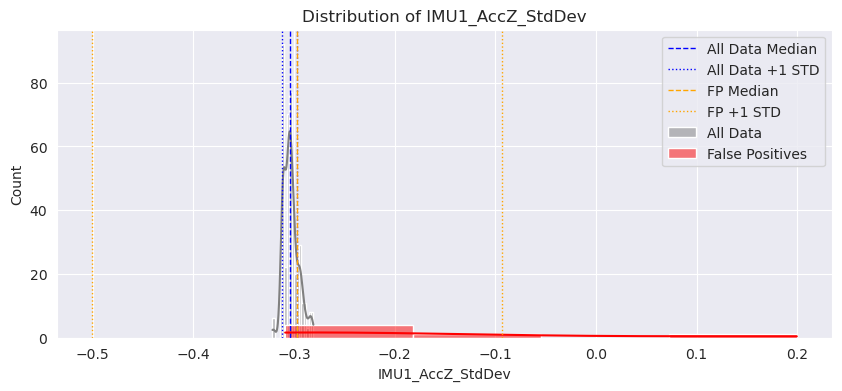

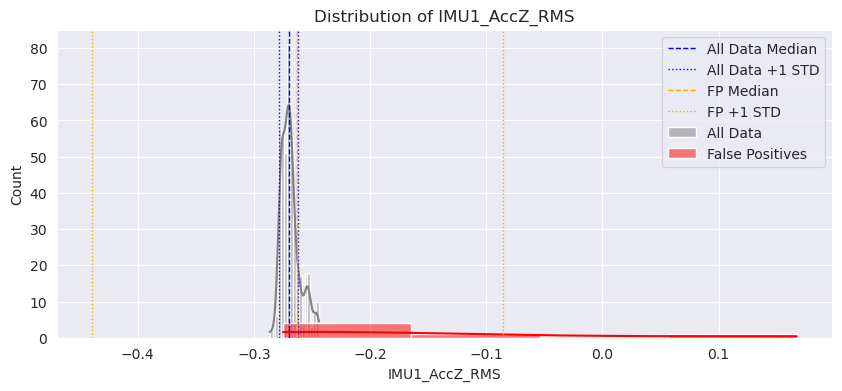

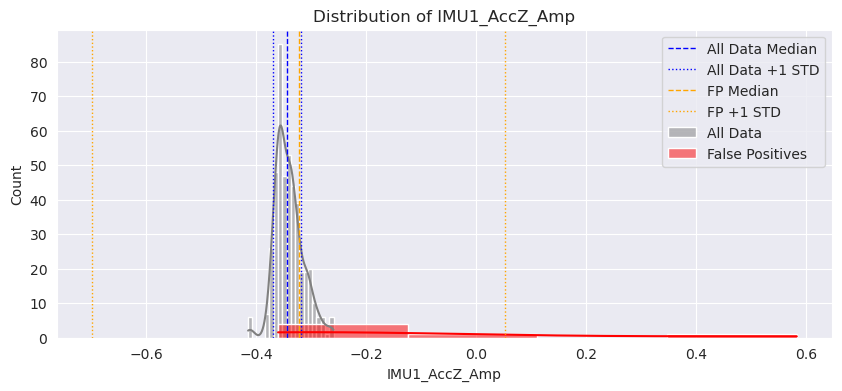

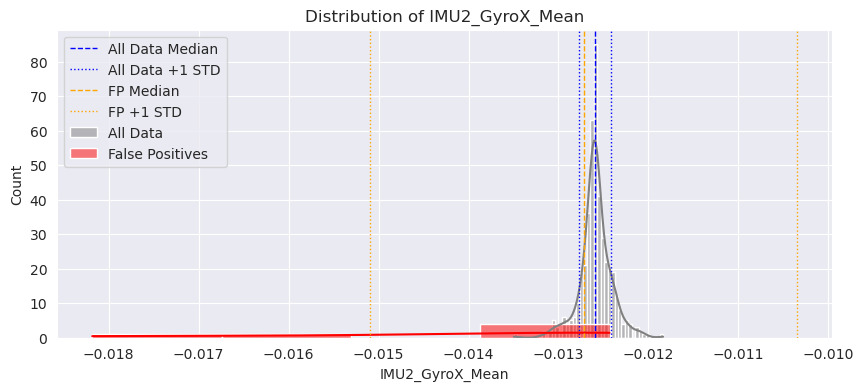

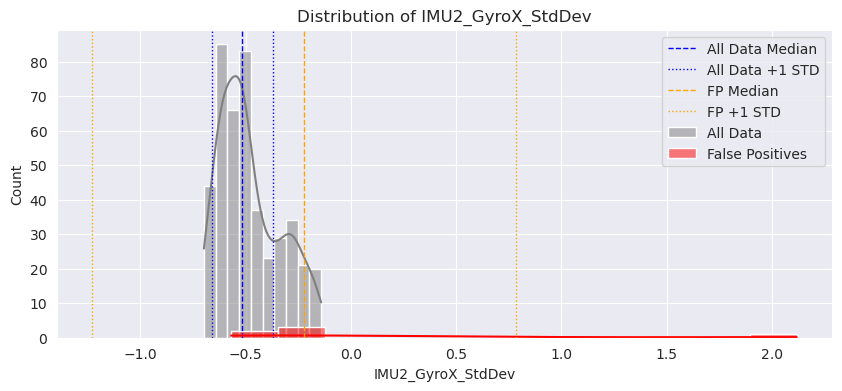

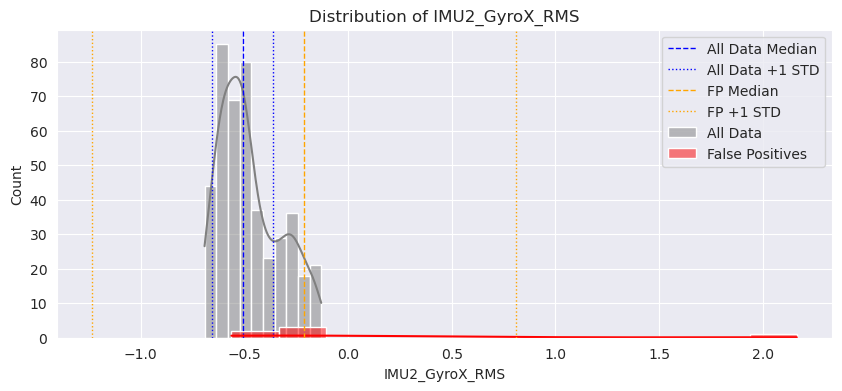

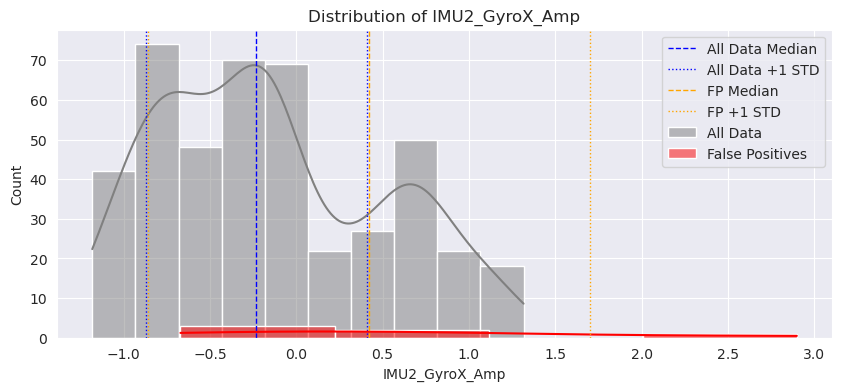

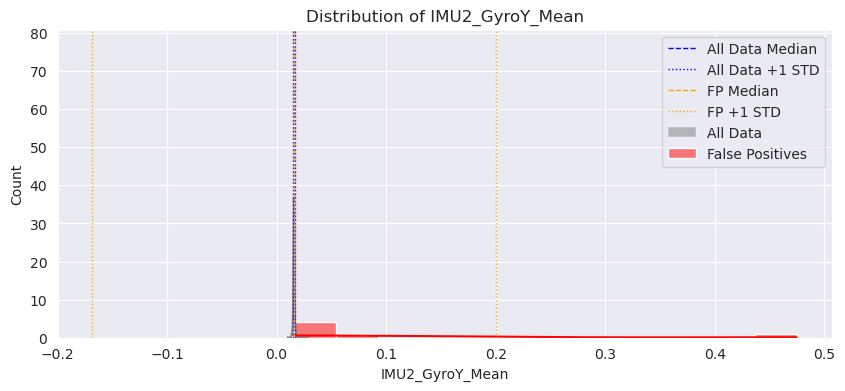

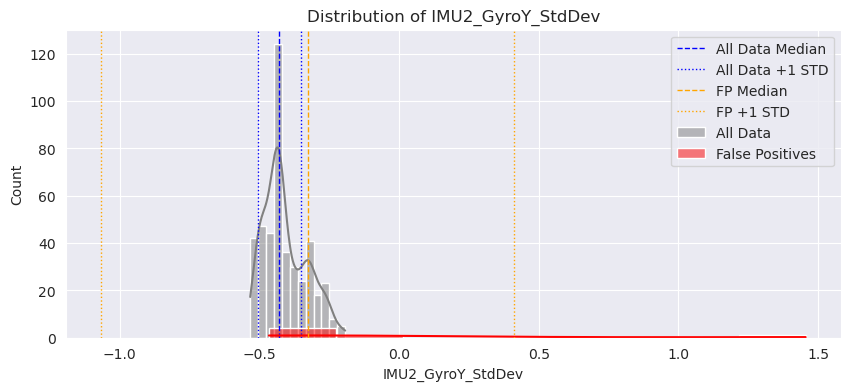

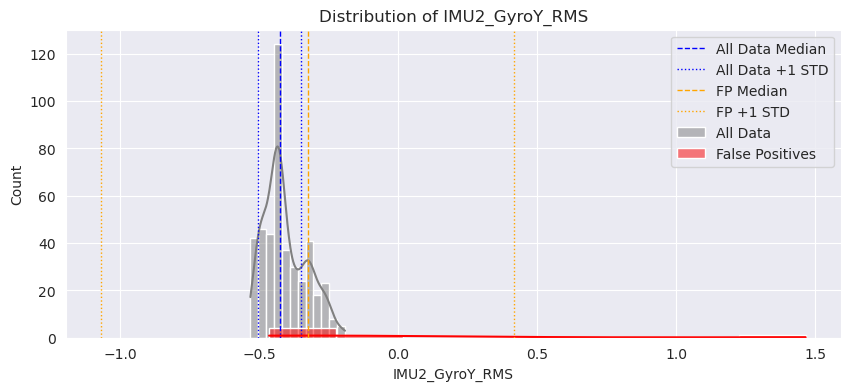

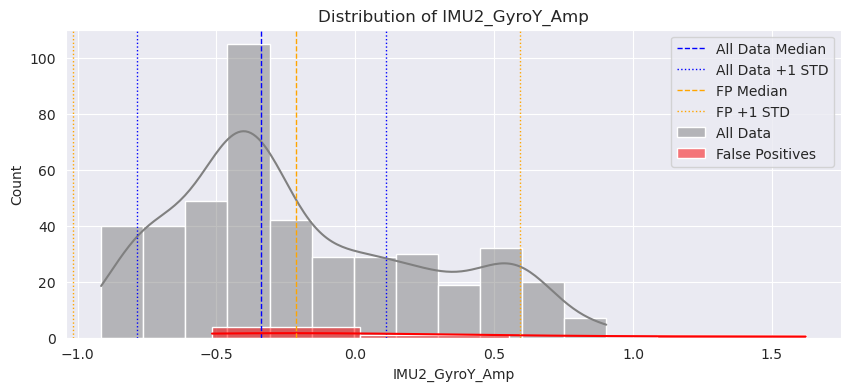

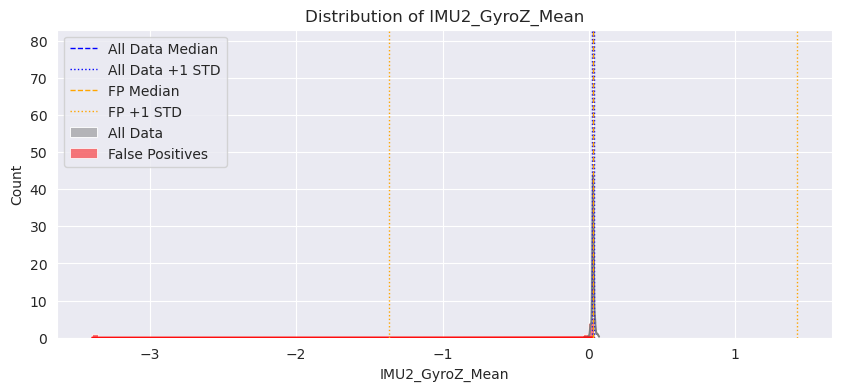

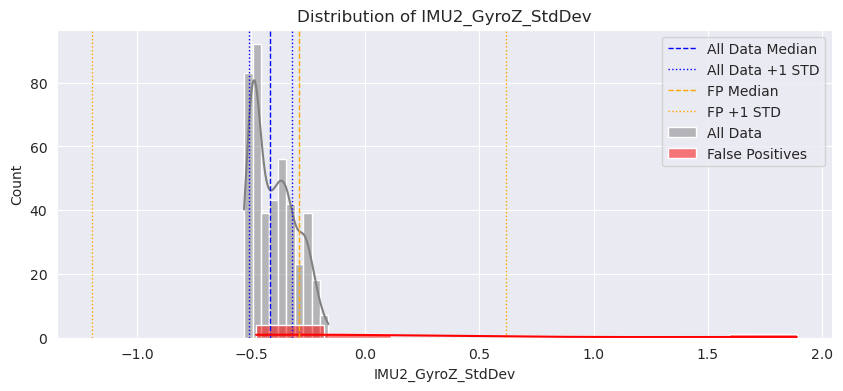

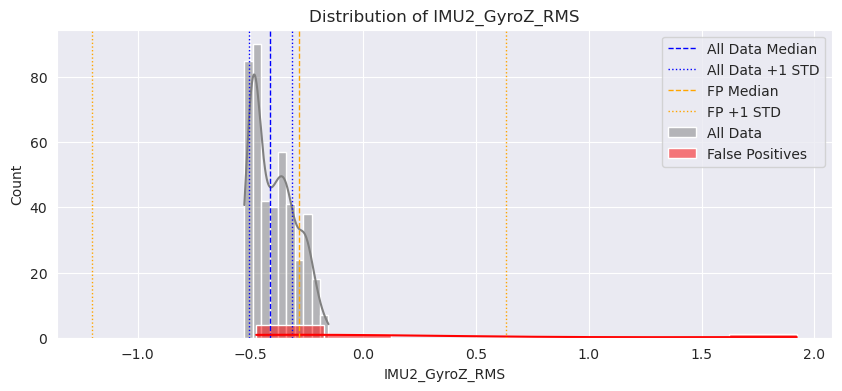

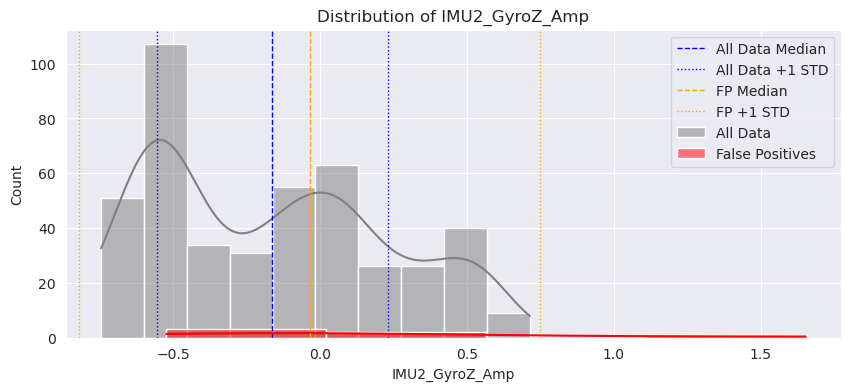

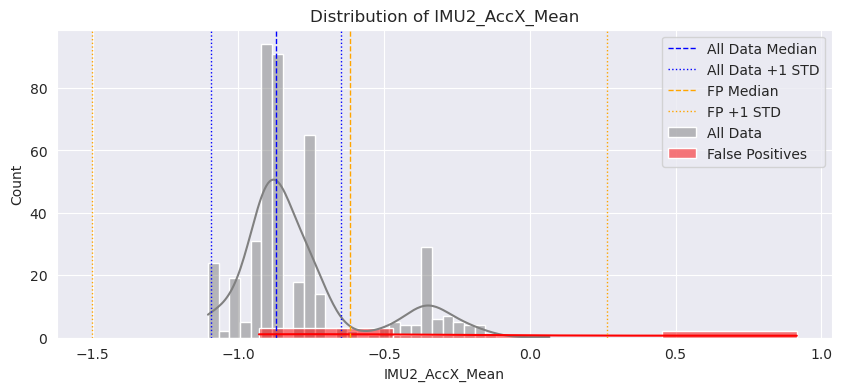

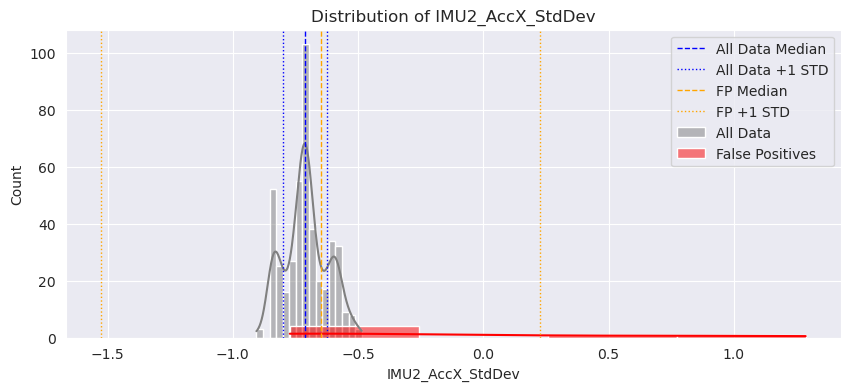

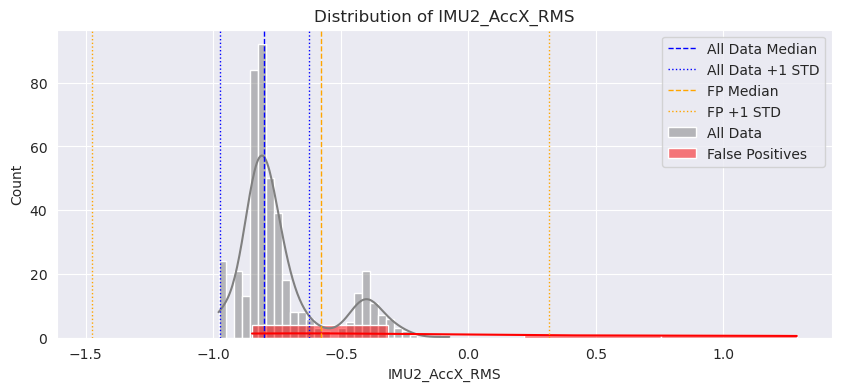

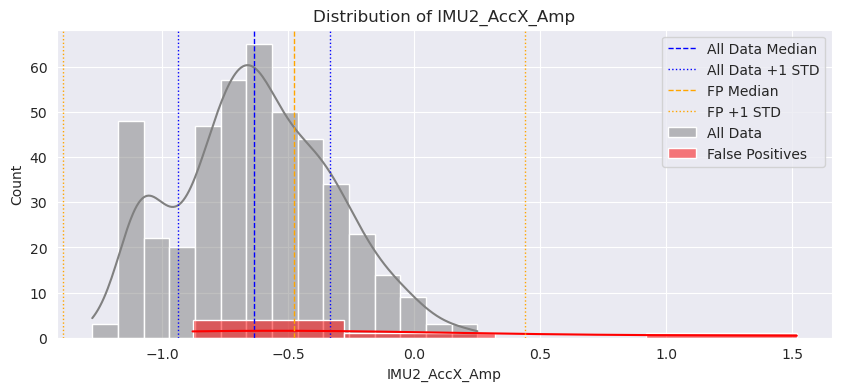

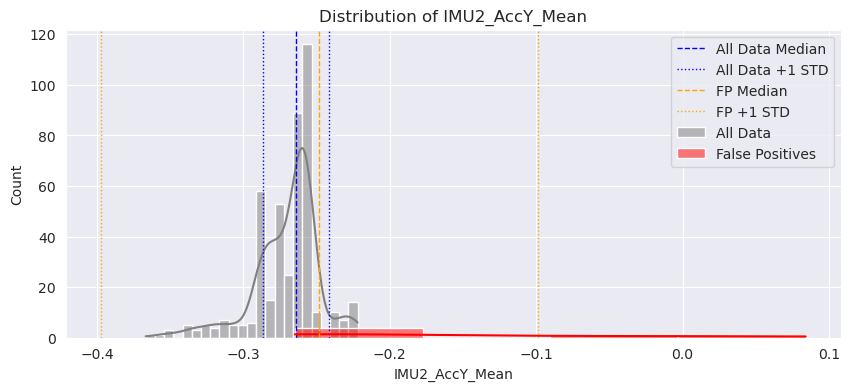

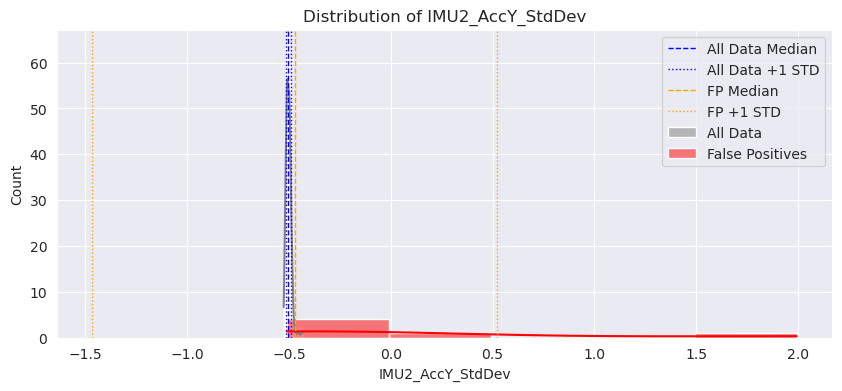

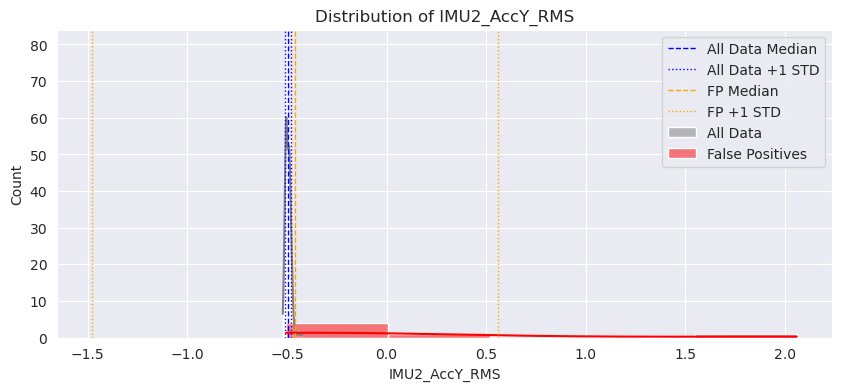

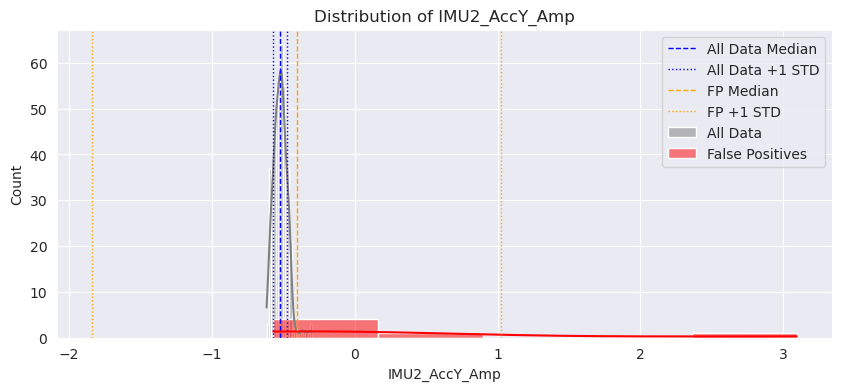

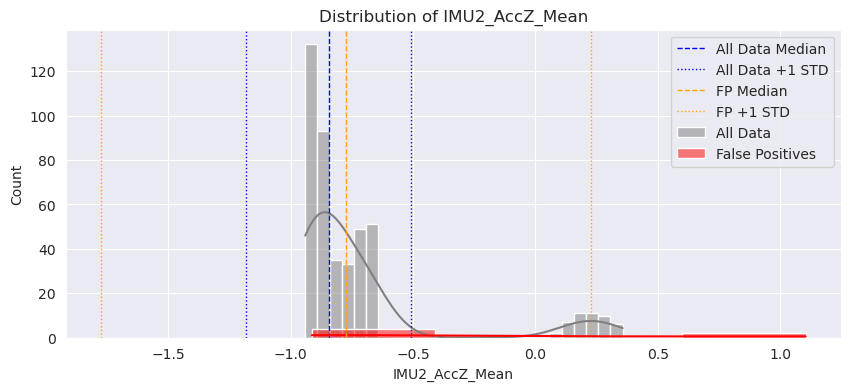

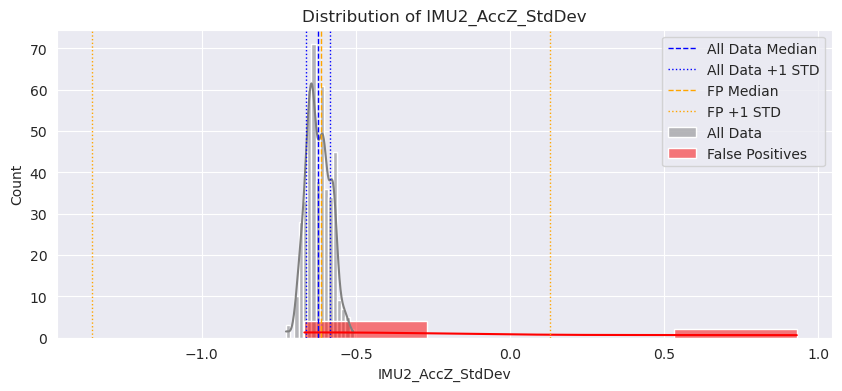

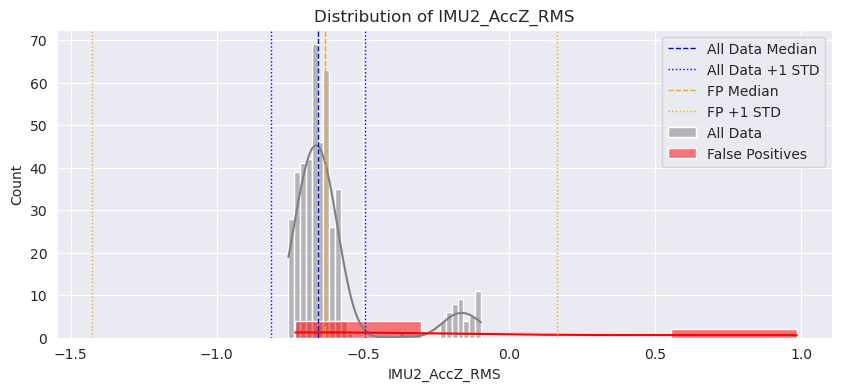

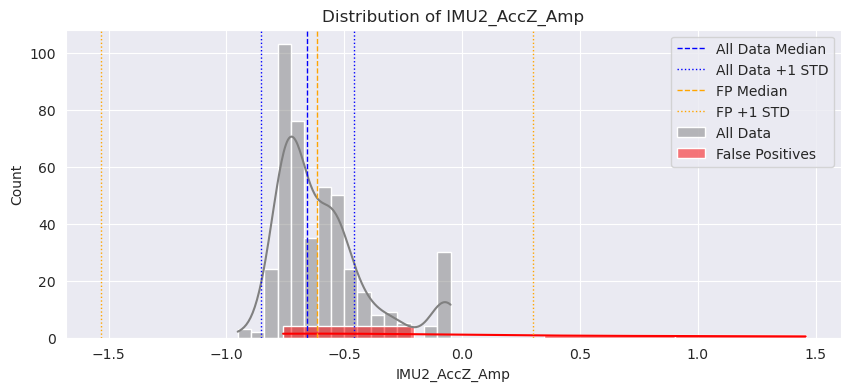

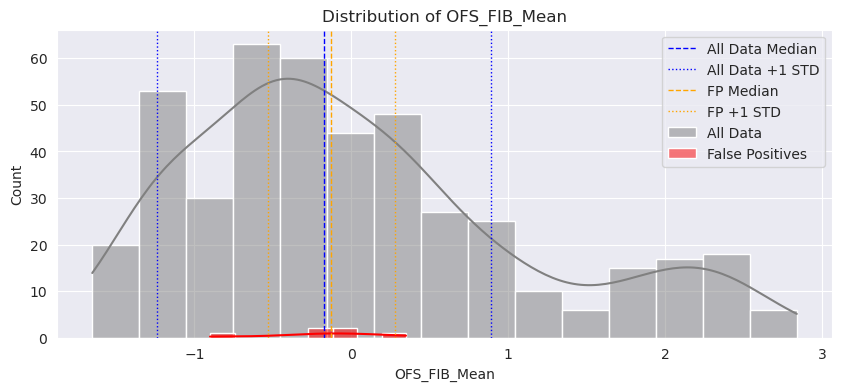

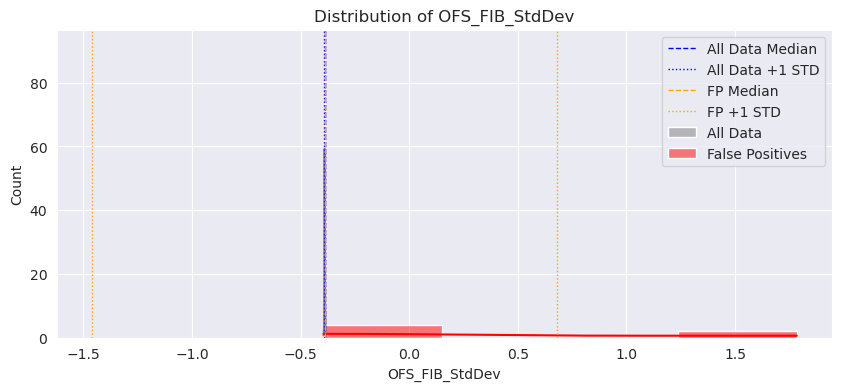

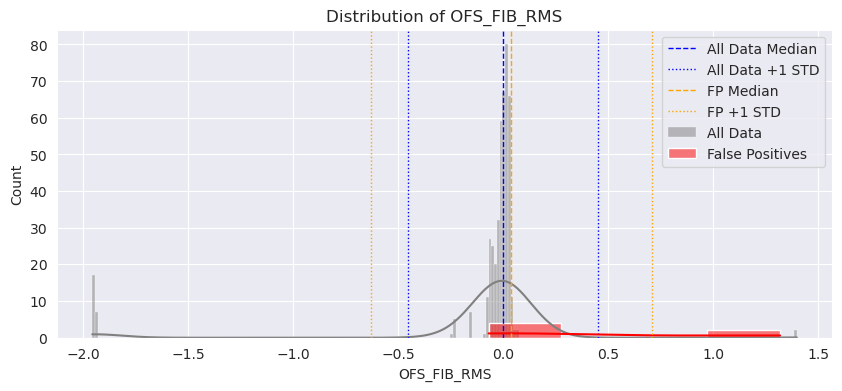

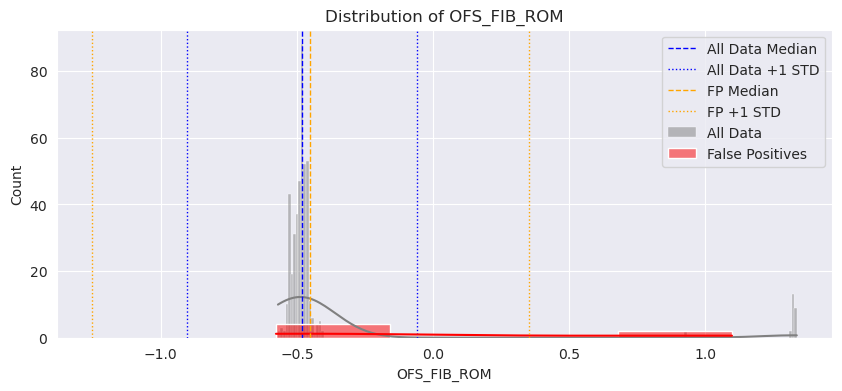

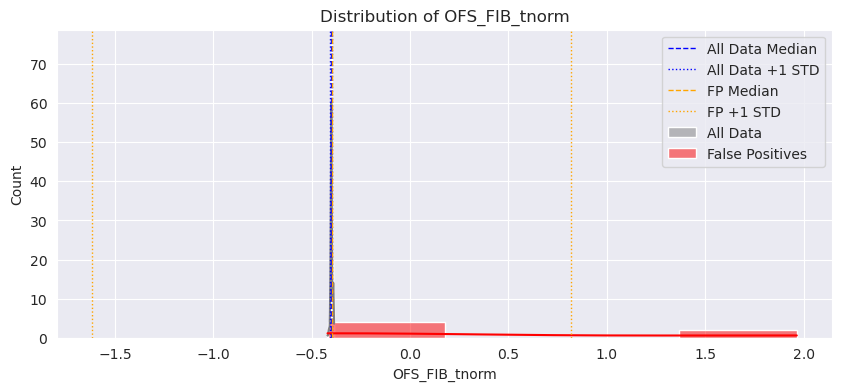

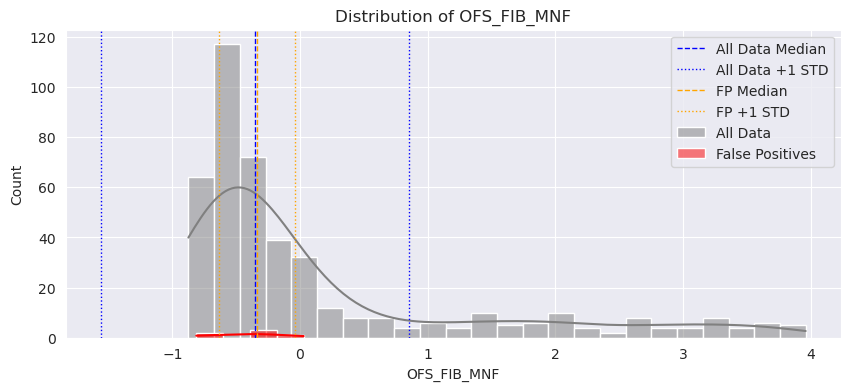

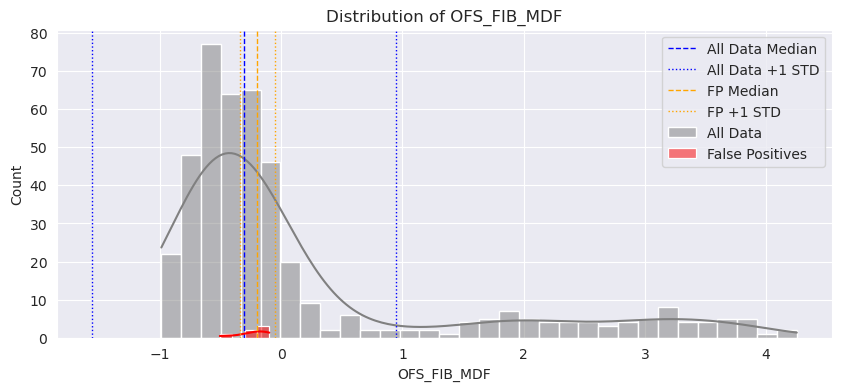

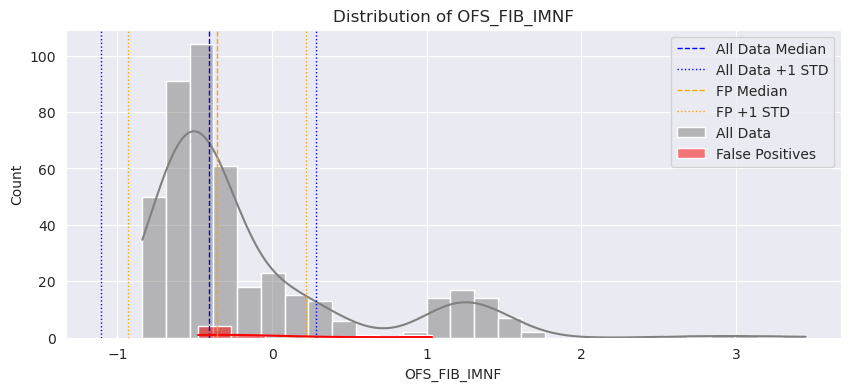

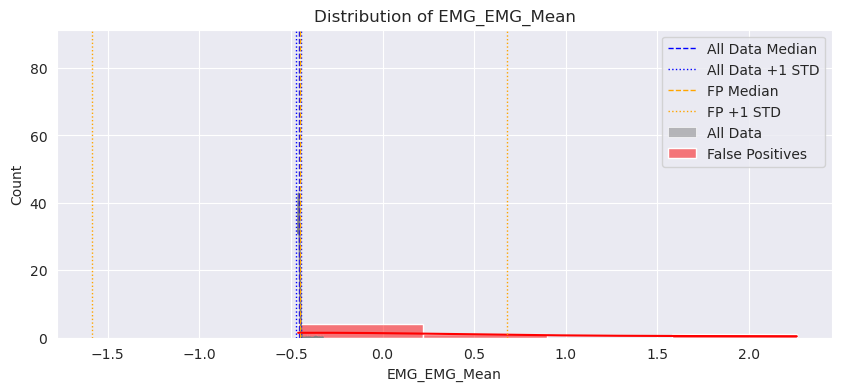

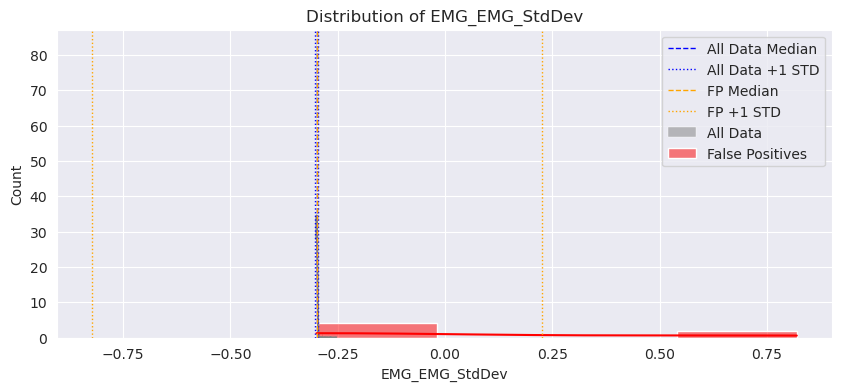

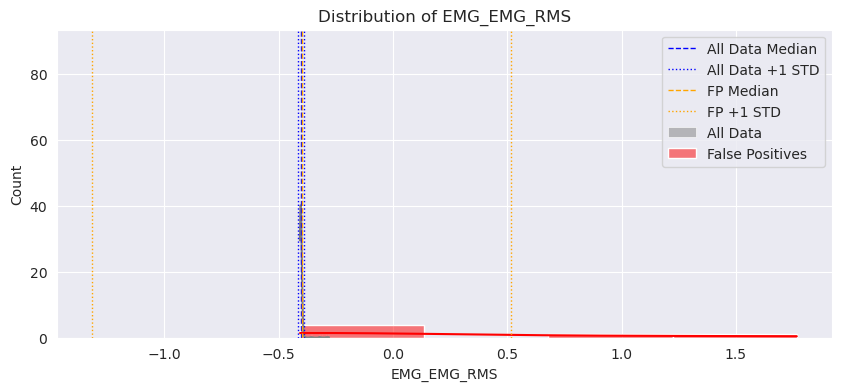

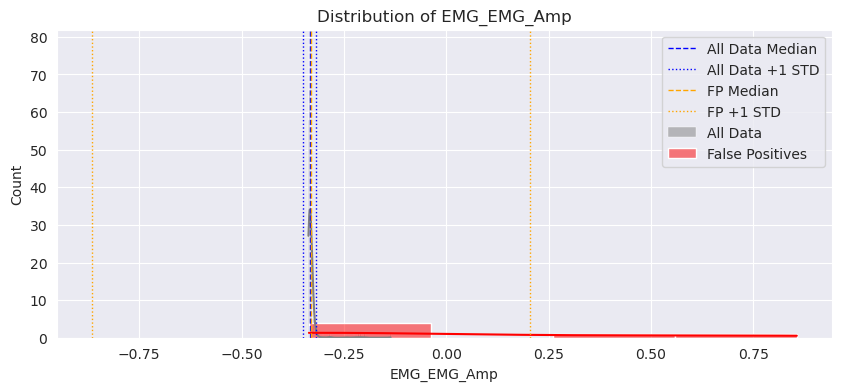

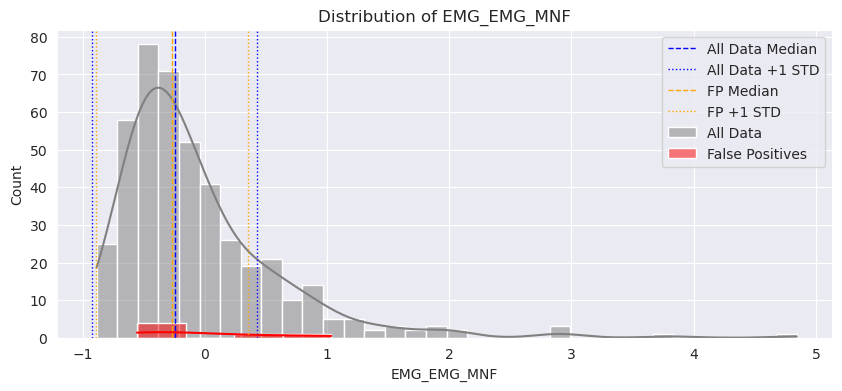

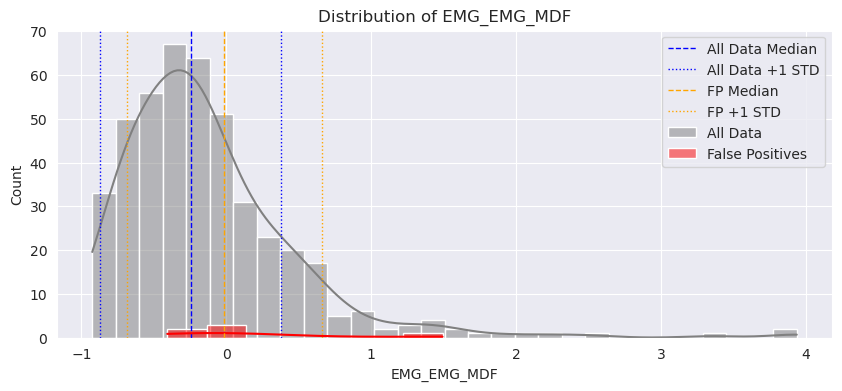

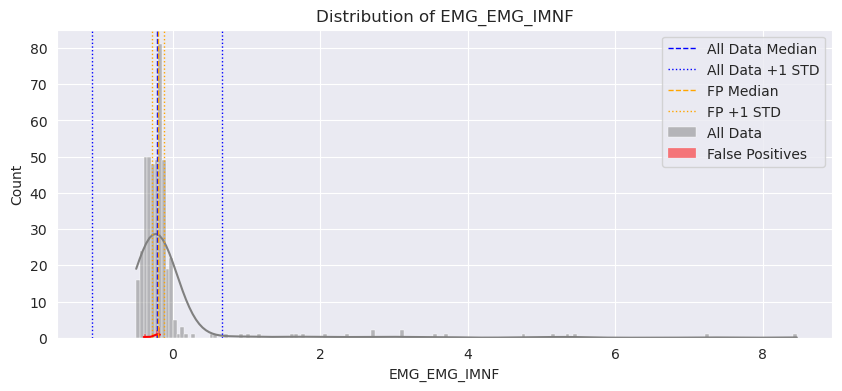

In [49]:
from matplotlib import pyplot as plt
# 对每个特征绘制直方图
import seaborn as sns

# 绘制直方图，并在上面标注中位数和一个标准差
for feature in high_dataset.columns:
    plt.figure(figsize=(10, 4))

    # 绘制整个数据集的该特征的分布
    sns.histplot(high_dataset[feature], color="grey", label="All Data", kde=True)
    # 标注整个数据集的中位数和标准差
    all_median = high_dataset[feature].median()
    all_std = high_dataset[feature].std()
    plt.axvline(all_median, color='blue', linestyle='dashed', linewidth=1, label='All Data Median')
    plt.axvline(all_median + all_std, color='blue', linestyle='dotted', linewidth=1, label='All Data +1 STD')
    plt.axvline(all_median - all_std, color='blue', linestyle='dotted', linewidth=1)

    # 绘制false positives的分布
    sns.histplot(high_medium_features[feature], color="red", label="False Positives", kde=True)
    # 标注false positives的中位数和标准差
    fp_median = high_medium_features[feature].median()
    fp_std = high_medium_features[feature].std()
    plt.axvline(fp_median, color='orange', linestyle='dashed', linewidth=1, label='FP Median')
    plt.axvline(fp_median + fp_std, color='orange', linestyle='dotted', linewidth=1, label='FP +1 STD')
    plt.axvline(fp_median - fp_std, color='orange', linestyle='dotted', linewidth=1)

    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.show()

